# Integer random numbers in Python and Numpy

https://towardsdatascience.com/how-to-generate-random-numbers-in-python-eb5aecf3e059

https://www.pythonpool.com/numpy-random/

https://www.javatpoint.com/numpy-random

The integers are selected from a linear uniform distribution

Python in closed [a, b]:

* np.array([np.array(random.randint(a, b) for _ in range(N)])

Numpy in semi-open [a, b):

* np.random.randint(a, b, N)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import copy
from time import time

In [2]:
a = 10
b = 20
N = 10

In [3]:
# Python
random.seed(1)
values = np.array([random.randint(a, b) for _ in range(N)])
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")

random.seed(1)
values = np.array([random.randint(a, b) for _ in range(N)])
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")

type=<class 'numpy.ndarray'>, shape=(10,), dtype=int64, values=
[12 19 11 14 11 17 17 17 20 16]
type=<class 'numpy.ndarray'>, shape=(10,), dtype=int64, values=
[12 19 11 14 11 17 17 17 20 16]


In [4]:
# Numpy 
np.random.seed(1)
values = np.random.randint(a, b, N)
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")

np.random.seed(1)
values = np.random.randint(a, b, N)
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")

type=<class 'numpy.ndarray'>, shape=(10,), dtype=int64, values=
[15 18 19 15 10 10 11 17 16 19]
type=<class 'numpy.ndarray'>, shape=(10,), dtype=int64, values=
[15 18 19 15 10 10 11 17 16 19]


In [5]:
# Numpy with other arguments
# generate integers in interval [10, 15) in a particular shape
print()
np.random.seed(1)
values = np.random.randint(10, 15, (3, 2))
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")
# mention the data type you want
print()
values = np.random.randint(10, 15, (3, 2), np.int8)
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")
print()
values = np.random.randint(10, 15, (3, 2), np.int32)
print(f"type={type(values)}, shape={values.shape}, dtype={values.dtype}, values=\n{values}")


type=<class 'numpy.ndarray'>, shape=(3, 2), dtype=int64, values=
[[13 14]
 [10 11]
 [13 10]]

type=<class 'numpy.ndarray'>, shape=(3, 2), dtype=int8, values=
[[10 10]
 [13 11]
 [10 14]]

type=<class 'numpy.ndarray'>, shape=(3, 2), dtype=int32, values=
[[14 11]
 [12 14]
 [12 14]]


In [6]:
bins = [i-0.5 for i in range(10, 17)]
bins

[9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5]

list_value has 10000000 elements, time to fill list is 26.144572973251343 seconds, time to convert the list to a numpy array is 1.7485179901123047 seconds, time to plot hist is 1.1147899627685547 seconds.


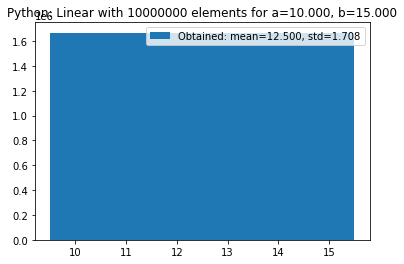

In [7]:
# ten million with Python - closed interval [a, b]
a = 10
b = 15
N = 10000000
random.seed(1)
start1 = time()
list_value = [random.randint(a, b) for _ in range(N)]
end1 = time()
start3 = time()
nparray_value = np.array(list_value)
end3 = time()
# let's plot the histogram
start2 = time()
title = f"Python: Linear with {N} elements for a={a:.3f}, b={b:.3f}"
label = f"Obtained: mean={np.mean(nparray_value):.3f}, std={np.std(nparray_value):.3f}"
plt.hist(nparray_value, bins = bins, label = label)
plt.title(title)
plt.legend()
end2 = time()
print(f"list_value has {len(list_value)} elements, time to fill list is {end1 - start1} seconds, time to convert the list to a numpy array is {end3 - start3} seconds, time to plot hist is {end2 - start2} seconds.")

list_value has 10000000 elements, time to fill list is 0.3213920593261719 seconds, time to convert the list to a numpy array is 1.7485179901123047 seconds, time to plot hist is 0.48865318298339844 seconds.


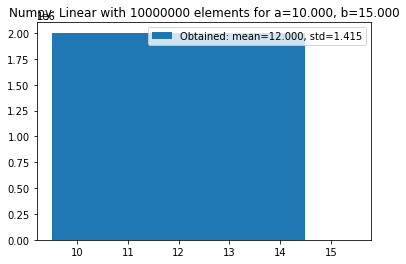

In [8]:
# ten million with Numpy - open interval [a, b)
a = 10
b = 15
N = 10000000
np.random.seed(1)
start1 = time()
nparray_value = np.random.randint(a, b, N)
end1 = time()
# let's plot the histogram
start2 = time()
title = f"Numpy: Linear with {N} elements for a={a:.3f}, b={b:.3f}"
label = f"Obtained: mean={np.mean(nparray_value):.3f}, std={np.std(nparray_value):.3f}"
plt.hist(nparray_value, bins = bins, label = label)
plt.title(title)
plt.legend()
end2 = time()
print(f"list_value has {len(list_value)} elements, time to fill list is {end1 - start1} seconds, time to convert the list to a numpy array is {end3 - start3} seconds, time to plot hist is {end2 - start2} seconds.")

Observe how indeed b = 15 is not drawn. To also draw it, we extend the value by one.

list_value has 10000000 elements, time to fill list is 0.29252099990844727 seconds, time to convert the list to a numpy array is 1.7485179901123047 seconds, time to plot hist is 1.2289409637451172 seconds.


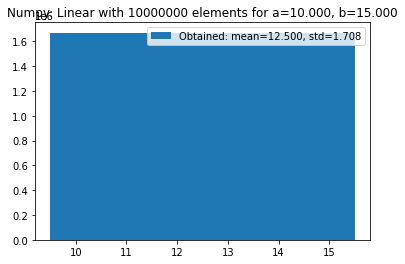

In [9]:
# ten million with Numpy - open interval [a, b]
a = 10
b = 15
N = 10000000
np.random.seed(1)
start1 = time()
nparray_value = np.random.randint(a, b+1, N)
end1 = time()
# let's plot the histogram
start2 = time()
title = f"Numpy: Linear with {N} elements for a={a:.3f}, b={b:.3f}"
label = f"Obtained: mean={np.mean(nparray_value):.3f}, std={np.std(nparray_value):.3f}"
plt.hist(nparray_value, bins = bins, label = label)
plt.title(title)
plt.legend()
end2 = time()
print(f"list_value has {len(list_value)} elements, time to fill list is {end1 - start1} seconds, time to convert the list to a numpy array is {end3 - start3} seconds, time to plot hist is {end2 - start2} seconds.")